<center><h1>KKBox Music Recommendation - v1</h1></center>
<hr>

## Table of Contents <a id="top"></a>

1. [Task Description](#1)
2. [Data Description](#2)
3. [Exploratory Data Analysis](#3)
    1. [Environment Setting](#3.1)
    2. [Observations](#3.2)
4. [Data Modeling](#4)

<hr>

# 1. Task Description <a id="1"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

Kaggle Competition for Music Recommendataion. [link](https://www.kaggle.com/c/kkbox-music-recommendation-challenge)

# 2. Data Description <a id="2"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

<img src="./ppt/figure/data1.png"/>

<img src="./ppt/figure/data2.png"/>

# 3. Exploratory Data Analysis <a id="1"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

## 1. Environment Setting <a id="3.1"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

### Import Library

In [1]:
# Linear Algebra
import numpy as np

# Dataframe
import pandas as pd

# Visualization
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns

# Verbose 'for' loop
from tqdm import tqdm

# sparse matrix
from scipy.sparse import csr_matrix

# machine learning
from sklearn.decomposition import TruncatedSVD

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
# available fonts for Non English(Korean) Character
font_fname = './static/fonts/D2Coding.ttc'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

### Import Dataset

In [4]:
# local path for dataset
train_path = './data/train.csv'
test_path = './data/test.csv'
sample_submission_path = './data/sample_submission.csv'
songs_path = './data/songs.csv'
members_path = './data/members.csv'
song_extra_info_path = './data/song_extra_info.csv'

In [5]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)
songs_df = pd.read_csv(songs_path)
members_df = pd.read_csv(members_path)
song_extra_info_df = pd.read_csv(song_extra_info_path)

In [6]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [7]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [8]:
sample_submission_df.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [9]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [10]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [11]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## 2. Observations <a id="3.2"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

### how many unique values in source_system_tab column?

In [12]:
train_test_df = train_df.copy()
train_test_df = train_df.append(test_df.copy(), ignore_index=True)
train_test_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target,id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,NaN
...,...,...,...,...,...,...,...
9934203,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist,NaN,2556785.0
9934204,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist,NaN,2556786.0
9934205,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist,NaN,2556787.0
9934206,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist,NaN,2556788.0


In [13]:
def draw_distribution(df, column):
    data = df.copy()
    data[column] = data[column].fillna('nan')

    plt.figure(figsize=(10, 10))
    sns.countplot(column, data=data)
    plt.title('Distribution of column: {}'.format(column))
    plt.xlabel(column)
    plt.xticks(rotation=60)
    plt.show()
    
    return data[column].value_counts()

In [14]:
def draw_distribution_by_target(df, column):
    data = df.copy()
    data[column] = data[column].fillna('nan')
    
    plt.figure(figsize=(10, 10))
    sns.countplot(column, hue='target', data=data)
    plt.title('Distribution of column by target: {}'.format(column))
    plt.xlabel(column)
    plt.xticks(rotation=60)
    plt.show()
    
    return data.groupby('target')[column].value_counts()

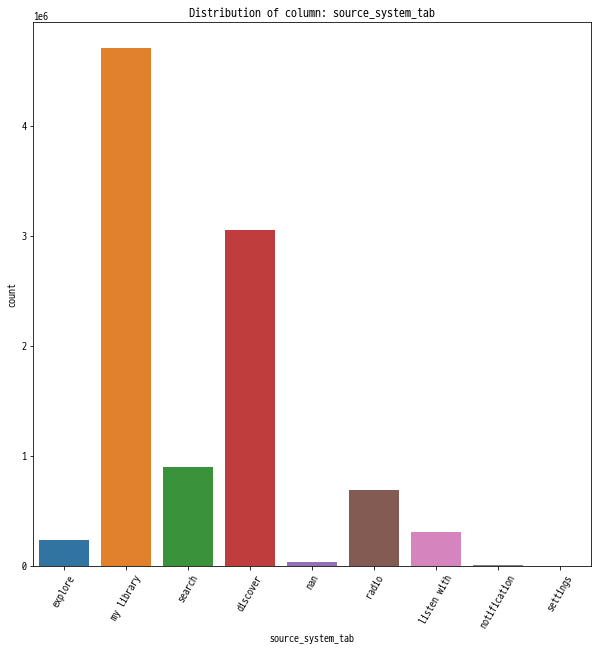

my library      4704222
discover        3050320
search           900901
radio            689466
listen with      310894
explore          233972
nan               33291
notification       8309
settings           2833
Name: source_system_tab, dtype: int64

In [15]:
column = 'source_system_tab'
draw_distribution(train_test_df, column)

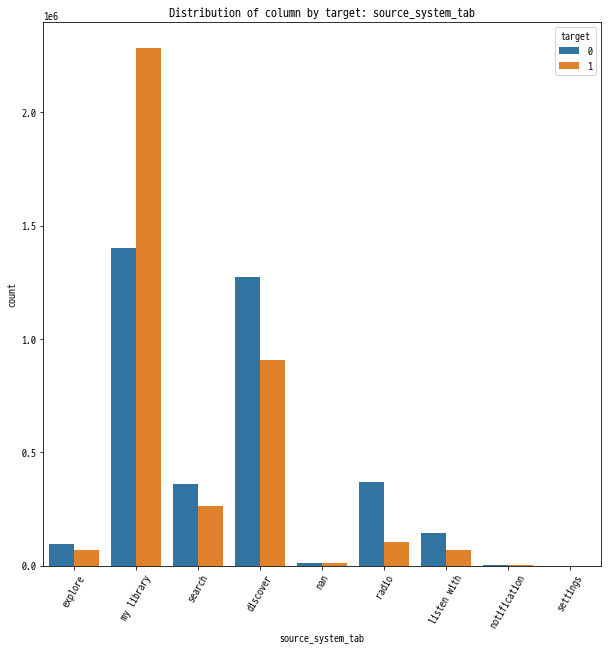

target  source_system_tab
0       my library           1401454
        discover             1273185
        radio                 370558
        search                360657
        listen with           142944
        explore                97050
        nan                    12167
        notification            3847
        settings                 900
1       my library           2283276
        discover              906067
        search                262629
        radio                 106143
        explore                70899
        listen with            69322
        nan                    12682
        notification            2338
        settings                1300
Name: source_system_tab, dtype: int64

In [16]:
column = 'source_system_tab'
draw_distribution_by_target(train_df, column)

### how many unique values in source_screen_name column?

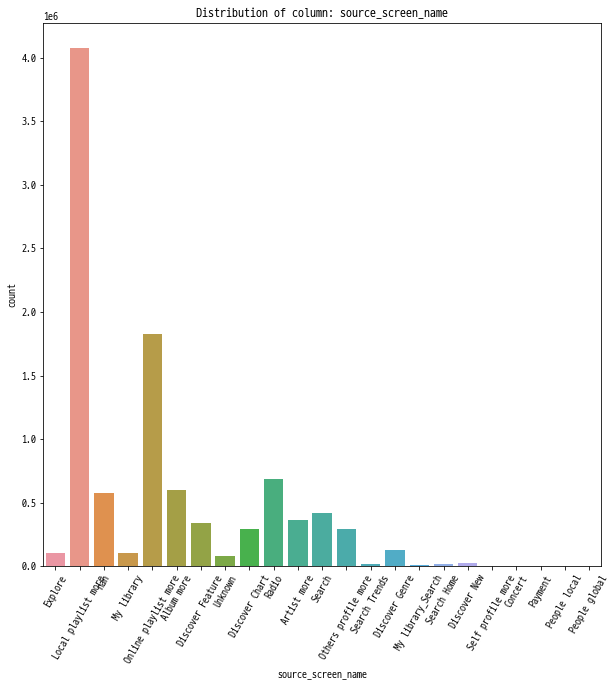

Local playlist more     4073317
Online playlist more    1824496
Radio                    685668
Album more               596285
nan                      577687
Search                   420469
Artist more              363428
Discover Feature         337647
Discover Chart           292657
Others profile more      292252
Discover Genre           123819
My library               101539
Explore                  100214
Unknown                   77790
Discover New              21232
Search Trends             18515
Search Home               18187
My library_Search          8565
Self profile more           343
Concert                      60
Payment                      24
People local                 13
People global                 1
Name: source_screen_name, dtype: int64

In [17]:
column = 'source_screen_name'
draw_distribution(train_test_df, column)

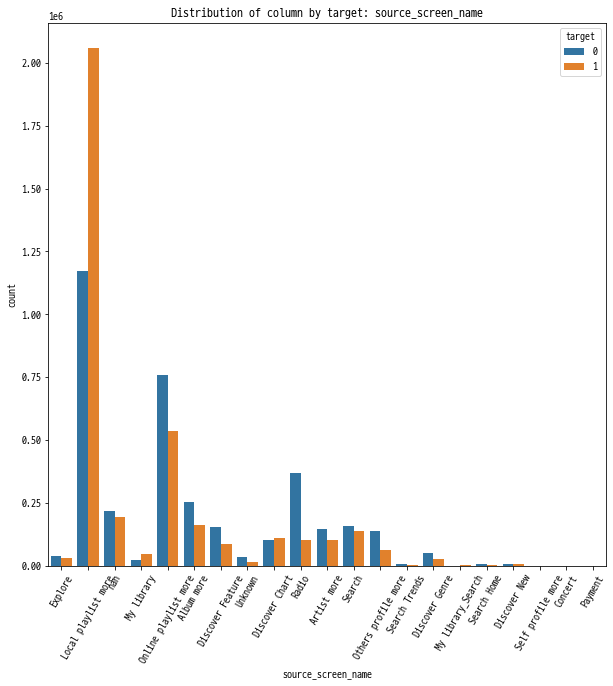

target  source_screen_name  
0       Local playlist more     1171891
        Online playlist more     757472
        Radio                    371386
        Album more               256063
        nan                      219934
        Search                   157676
        Discover Feature         155315
        Artist more              147202
        Others profile more      138708
        Discover Chart           103190
        Discover Genre            53605
        Explore                   39922
        Unknown                   35798
        My library                26048
        Search Home                8715
        Discover New               8687
        Search Trends              8493
        My library_Search          2508
        Self profile more           122
        Concert                      23
        Payment                       4
1       Local playlist more     2056311
        Online playlist more     537217
        nan                      194870
        Alb

In [18]:
column = 'source_screen_name'
draw_distribution_by_target(train_df, column)

### how many unique values in source_type column?

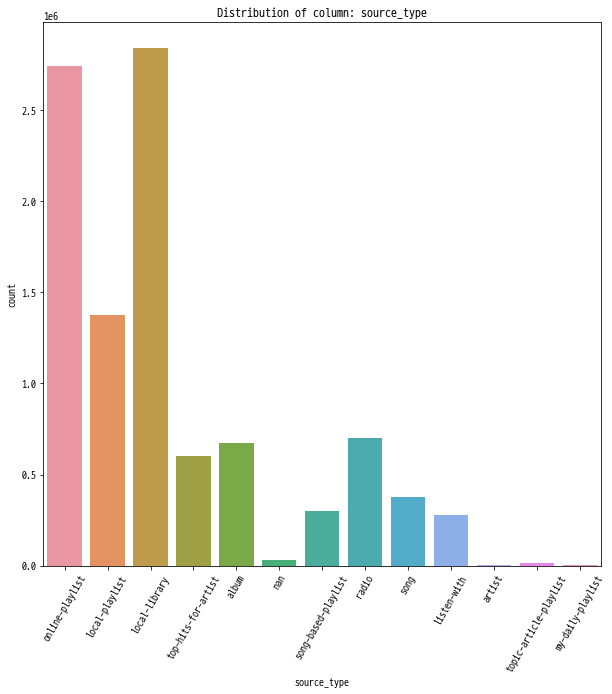

local-library             2843745
online-playlist           2742456
local-playlist            1374040
radio                      698273
album                      672534
top-hits-for-artist        602974
song                       373875
song-based-playlist        297706
listen-with                277341
nan                         28836
topic-article-playlist      16276
artist                       3466
my-daily-playlist            2686
Name: source_type, dtype: int64

In [19]:
column = 'source_type'
draw_distribution(train_test_df, column)

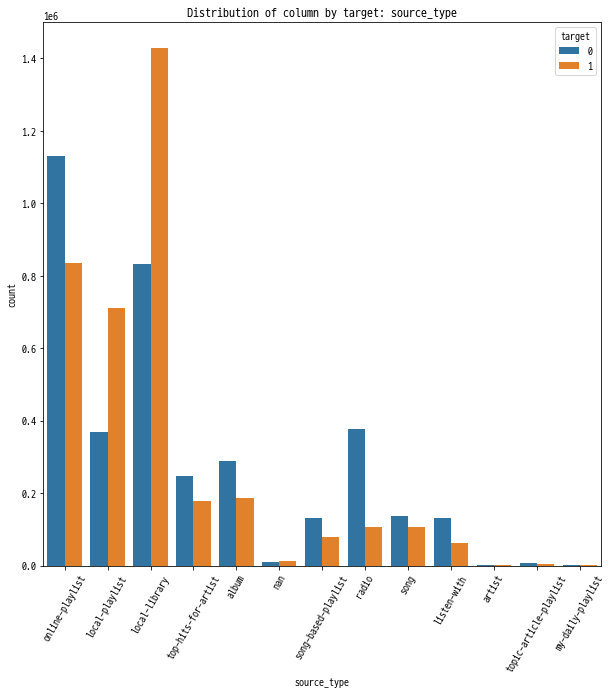

target  source_type           
0       online-playlist           1131585
        local-library              831973
        radio                      376953
        local-playlist             369493
        album                      289547
        top-hits-for-artist        246316
        song                       137666
        listen-with                131200
        song-based-playlist        130430
        nan                         10226
        topic-article-playlist       5661
        artist                       1298
        my-daily-playlist             414
1       local-library             1429426
        online-playlist            836339
        local-playlist             710010
        album                      187797
        top-hits-for-artist        177298
        song                       107056
        radio                      106156
        song-based-playlist         80097
        listen-with                 61642
        nan                         11313
   

In [20]:
column = 'source_type'
draw_distribution_by_target(train_df, column)

> For the columns ['source_system_tab', 'source_screen_name', 'source_type'], there are some values that lead to target=1. Also there are som missing values(nan). Consider these missing values as a cateogry, because the percentage is not that big and imputation to the 'most-frequent-value' is awkward.

### song dataset

In [21]:
songs_df.describe(include='all')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,2296320,2.296320e+06,2202204,2296320,1224966,351052,2.296319e+06
unique,2296320,NaN,1045,222363,329823,110925,NaN
top,yvAiEPyNfILdDeLQXdviwknhq3FiXku7FbYj1rD9TJk=,NaN,465,Various Artists,Neuromancer,Traditional,NaN
freq,1,NaN,567911,145916,17888,1751,NaN
mean,NaN,2.469935e+05,NaN,NaN,NaN,NaN,3.237800e+01
std,NaN,1.609200e+05,NaN,NaN,NaN,NaN,2.433241e+01
min,NaN,1.850000e+02,NaN,NaN,NaN,NaN,-1.000000e+00
25%,NaN,1.836000e+05,NaN,NaN,NaN,NaN,-1.000000e+00
50%,NaN,2.266270e+05,NaN,NaN,NaN,NaN,5.200000e+01
75%,NaN,2.772690e+05,NaN,NaN,NaN,NaN,5.200000e+01


In [22]:
songs_df.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [23]:
songs_cleaned_df = songs_df.copy()

### song dataset: song_length → binning + normalizing

In [24]:
def draw_kdeplot(df, column):
    plt.figure(figsize=(10, 10))
    sns.kdeplot(df[column], shade=True)
    plt.title('{} Distribution'.format(column))
    plt.show()

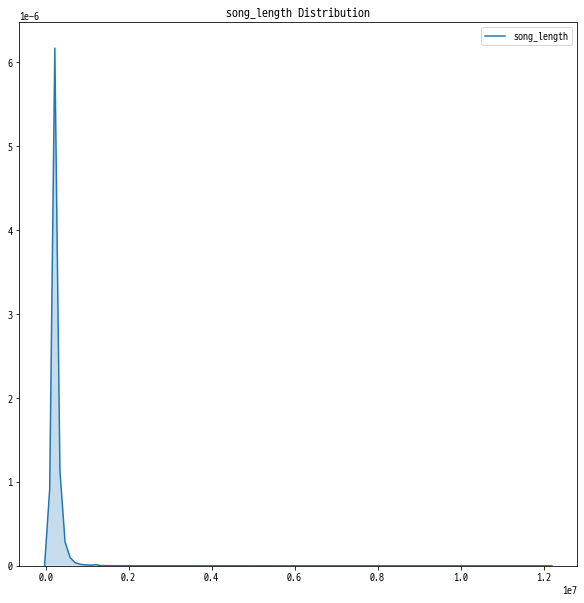

In [25]:
draw_kdeplot(songs_cleaned_df, 'song_length')

In [26]:
def bin_and_normalize_song_length(df, n=101):
    df['song_length_bin'] = pd.cut(df['song_length'], n, labels=np.linspace(0, 1, n))
    
    plt.figure(figsize=(10, 10))
    sns.countplot('song_length_bin', data=df)
    
    plt.xticks([])

    return df['song_length_bin'].value_counts()

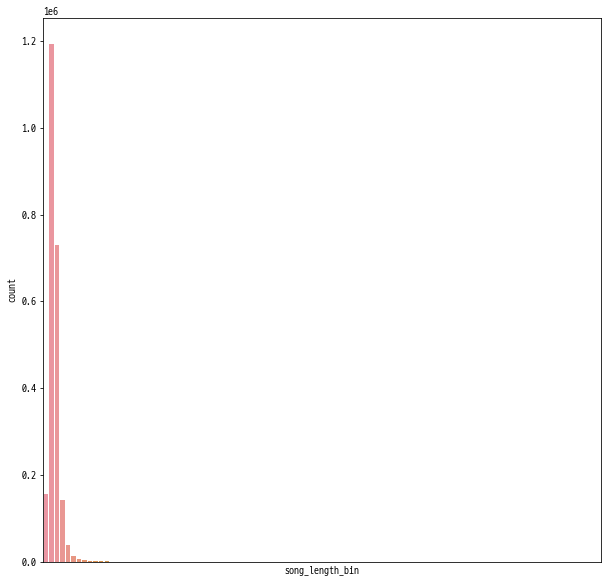

In [27]:
_ = bin_and_normalize_song_length(songs_cleaned_df, n=101)

### song dataset: genre_ids → imputation

In [28]:
def impute_genre_ids(df):
    artist_genres = dict()
    for row in tqdm(df[df['genre_ids'].isna()].iterrows()):
        artist = row[1]['artist_name']
        if artist not in artist_genres.keys():
            genres = df.loc[df['artist_name'] == artist, 'genre_ids'].value_counts()
            if len(genres) != 0:
                artist_genres[artist] = genres.index[0]
            else:
                artist_genres[artist] = np.nan
                
        df.loc[row[0], 'genre_ids'] = artist_genres[artist]
    
    return artist_genres

In [29]:
# _ = impute_genre_ids(songs_cleaned_df)

# 4. Data Modeling <a id="4"></a>
<p style="text-align: right;"><a href="#top">top 🔝</a></p>

> There are some user and song in test which is not in train

In [30]:
def split_train_validation(df, threshold=0.8):
    train_validation = df.copy()
    mask = np.random.rand(len(df)) < threshold
    train = train_validation[mask]
    validation = train_validation[~mask]
    
    return train, validation

In [31]:
train_split_df, validation_split_df = split_train_validation(train_df)

In [32]:
train_split_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377412,iqvMM4aArQynHovYYKh0u5k2A+9uYuYX+wqZXV5LuxI=,0ftZO/ByXbLHmtLPt5NwATkT3OrbCuZ7CvrsnL3BvqQ=,my library,Local playlist more,local-library,1
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [33]:
validation_split_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
11,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,8FGjC9W+7F8WjheGZPAwX9RH3+nWSO7DzjM6EB6naOI=,my library,Local playlist more,local-library,1
12,TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,my library,NaN,top-hits-for-artist,0
15,3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=,6HofPS0v2MVFsL10yCN7dXUL+gUOnvsD35vx3HmRbdE=,my library,Local playlist more,local-library,1
...,...,...,...,...,...,...
7377395,muqxBsLGNBqgLUB0gfMwpP04Ittx6rfPP8wLU8sxL6o=,ErPRXGRceRiRcXmFRTPQctExivZ+dKjf/sHKyrbvVmo=,my library,Local playlist more,local-library,0
7377396,muqxBsLGNBqgLUB0gfMwpP04Ittx6rfPP8wLU8sxL6o=,xPOep/X2ck9EtyC7KlQpbkO4G6fmtQiMtKawVks9J/A=,my library,Local playlist more,local-library,0
7377403,CRo1X/++zVnTpjJ4RzHSKzQCjUjn5FK11LtDWgGKtrY=,ngHLycwRjBbLxc/1GeJgaPsuifgiYH1ctvWYesXwlbE=,discover,NaN,song-based-playlist,1
7377405,qfFzu7U7jkrrQTRCg7msiDTg5YzpyiFbGJMS9ikWiIQ=,wev1Fi6KYkCSFAstQfhxJPZv7wkn8wGepys+KDmeBy4=,my library,Local playlist more,local-library,1


In [34]:
def transform_to_csr_matrix(df):
    user2idx = {user: idx for idx, user in enumerate(df['msno'].unique())}
    idx2user = {idx: user for idx, user in enumerate(df['msno'].unique())}
    item2idx = {item: idx for idx, item in enumerate(df['song_id'].unique())} 
    idx2item = {idx: item for idx, item in enumerate(df['song_id'].unique())}
    
    rows = [user2idx[user] for user in df['msno']]
    cols = [item2idx[item] for item in df['song_id']]
    data = [target if target == 1 else -1 for target in df['target']]
    csr = csr_matrix((data, (rows, cols)))
    
    return user2idx, idx2user, item2idx, idx2item, csr

In [35]:
user2idx, idx2user, item2idx, idx2item, csr = transform_to_csr_matrix(train_split_df)

In [36]:
def svd_decomposition(csr, n_components=50, n_iter=10):
    svd = TruncatedSVD(n_components=n_components, n_iter=n_iter, random_state=2020)
    U = svd.fit_transform(csr)
    return svd, U, np.diag(svd.singular_values_), svd.components_

In [37]:
svd, U, sigma, Vt = svd_decomposition(csr)

In [38]:
U.shape

(30548, 50)

In [39]:
sigma.shape

(50, 50)

In [40]:
Vt.shape

(50, 324428)

In [41]:
validation_user = [user2idx[user] if user in user2idx.keys() else -1 for user in validation_split_df['msno']]
validation_item = [item2idx[item] if item in item2idx.keys() else -1 for item in validation_split_df['song_id']]

In [58]:
def predict(U, sigma, Vt, user, item):
    U_sigma = np.dot(U, sigma)
    target = list()
    for u, i in tqdm(zip(user, item)):
        if u == -1 or i == -1:
            target.append(0)
        else:
            target.append(int(np.dot(U_sigma, Vt[:, i:i+1])[u, 0] > 0))

    return target

In [59]:
prediction = predict(U, sigma, Vt, validation_user, validation_item)

1475307it [08:34, 2867.76it/s]


In [66]:
def accuracy(prediction, real):
    return np.mean(np.equal(prediction, real))

In [67]:
real = list(validation_split_df['target'])

In [68]:
accuracy(prediction, real)

0.6551782103657069

### For Submission

In [69]:
user2idx, idx2user, item2idx, idx2item, csr = transform_to_csr_matrix(train_df)
svd, U, sigma, Vt = svd_decomposition(csr, n_components=100, n_iter=20)

In [75]:
test_user = [user2idx[user] if user in user2idx.keys() else -1 for user in test_df['msno']]
test_item = [item2idx[item] if item in item2idx.keys() else -1 for item in test_df['song_id']]
prediction = predict(U, sigma, Vt, test_user, test_item)

2556790it [28:34, 1491.21it/s]


In [76]:
submission = sample_submission_df.copy()
submission['target'] = prediction
submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
2556785,2556785,0
2556786,2556786,0
2556787,2556787,1
2556788,2556788,0


In [77]:
submission.to_csv('./data/submissions/submission_v1.csv', index=False)